In [92]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import tensorflow as tf

In [93]:
p1 = np.array([-1,-1,1,-1,-1,-1,1,-1,1,-1,1,1,1,1,1,1,-1,-1,-1,1])
p6 = np.array([1,1,1,1,1,1,-1,-1,-1,-1,1,1,1,-1,-1,1,1,1,1,1])
p11 = np.array([-1,1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1])
p16 = np.array([1,1,1,1,1,1,-1,-1,-1,1,1,-1,-1,-1,1,1,1,1,1,1])
p21 = np.array([1,-1,-1,-1,1,1,-1,-1,-1,1,1,-1,-1,-1,1,1,1,1,1,1])

In [94]:
p1 = p1.reshape(4,5)
p6 = p6.reshape(4,5)
p11 = p11.reshape(4,5)
p16 = p16.reshape(4,5)
p21 = p21.reshape(4,5)

In [95]:
p1.shape

(4, 5)

In [96]:
base = [p1,p6,p11,p16,p21]

In [97]:
def show(figs): # This function is use to show image
    img=plt.figure(figsize=(10, 10))
    for i in range(len(figs)):
        img.add_subplot(5, 5, i+1)
        plt.imshow(figs[i]-1, cmap='Greys')

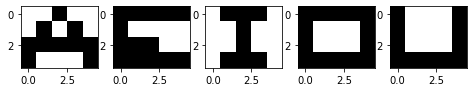

In [98]:
img=plt.figure(figsize=(8, 8))
for i in range(1,6):
    img.add_subplot(5, 5, i)
    plt.imshow(base[i-1]-1, cmap='Greys')

In [99]:
a_mod = np.array([[2,1],[3,2],[3,4],[4,4]])
e_mod = np.array([[2,2],[4,2],[5,3],[4,3]])
i_mod = np.array([[1,1],[4,2],[1,4],[4,3]])
o_mod = np.array([[2,2],[4,2],[2,3],[4,3]])
u_mod = np.array([[2,1],[4,1],[2,3],[4,3]])

In [100]:
mod = [a_mod,e_mod,i_mod,o_mod,u_mod]

In [101]:
def modify(base, mod):
    lst = []
    lst.append(base)
    for i in range(len(mod)):
        tmp = copy.deepcopy(base)
        tmp[mod[i][1]-1,mod[i][0]-1] *= -1
        lst.append(tmp)

    return lst

In [102]:
a_test = modify(base[0], mod[0])
e_test = modify(base[1], mod[1])
i_test = modify(base[2], mod[2])
o_test = modify(base[3], mod[3])
u_test = modify(base[4], mod[4])

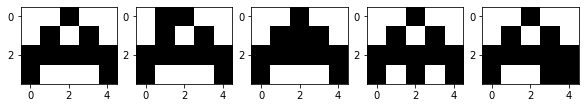

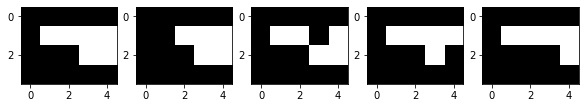

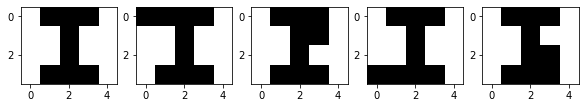

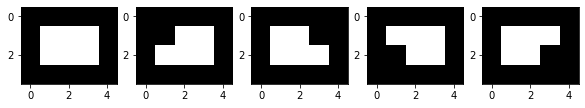

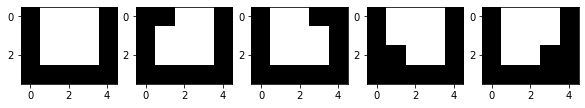

In [103]:
show(a_test)
show(e_test)
show(i_test)
show(o_test)
show(u_test)

In [104]:
test = a_test[0]


In [105]:
test

array([[-1, -1,  1, -1, -1],
       [-1,  1, -1,  1, -1],
       [ 1,  1,  1,  1,  1],
       [ 1, -1, -1, -1,  1]])

In [106]:
test.flatten('C')

array([-1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1])

In [107]:
weights = []
weights.append(np.random.rand(20))
weights.append(np.random.rand(10))
weights

[array([0.35426343, 0.82255124, 0.24955603, 0.65364163, 0.70312421,
        0.77885477, 0.13504256, 0.05178903, 0.95720876, 0.82112842,
        0.03633607, 0.96029929, 0.09204135, 0.55686306, 0.40665103,
        0.84960353, 0.42497476, 0.27588887, 0.73905928, 0.9182546 ]),
 array([0.26909145, 0.69202023, 0.34062075, 0.26926077, 0.71835323,
        0.1693756 , 0.16389529, 0.73247862, 0.08570128, 0.01189775])]

In [108]:
class Neural_Network:
    
    def __init__(self, input_shape=np.ndarray):
        self.output = []
        self.weights = []
        self.bias = []
        self.activation = []



    @staticmethod
    def flatten( data=np.ndarray):
        if data.ndim == 2:
            return np.ndarray.flatten('C')
        else:
            return data


    def add_layer(self, neurons: int, activation: str, input_shape=None):
        if input_shape is None:
            try:
                self.weights.append(np.random.rand(self.weights[-1].shape[1],neurons))
            except IndexError:
                print('hello')
                self.weights.append(np.random.rand(neurons,1))

            self.bias.append(np.random.rand(neurons))
            self.activation.append(self.activation_f(activation))
        else:
            input = np.prod(input_shape)
            self.weights.append(np.random.rand(input,neurons))
            self.bias.append(np.random.rand(neurons))
            self.activation.append(self.activation_f(activation))


    @staticmethod
    def sigmoid(x: int, derivative: bool=False):
        z = 1/(1+np.exp(-x))
        if derivative:
            z = z * (1-z)
        return z

    def sigmoid_derivative(self, x: int):
        val = self.sigmoid(x)
        z = val * (1-val)
        return z

    @staticmethod
    def tanh(x: int, derivative: bool=False):
        z =  (1-np.exp(-2*x)) / (1+np.exp(-2*x))
        if derivative:
            z = (1 + z) * (1 - z)
        return z

    def tanh_derivative(self, x: int):
        val = self.tanh(x)
        z = (1 + val) * (1 - val)
        return z

    @staticmethod
    def linear(x: int, derivative: bool=False):
        if derivative:
            return 1
        return x

    @staticmethod
    def linear_derivative():
        return 1

    def activation_f(self, activation_name: str):

        activation = {
            'linear' : self.linear,
            'sigmoid' : self.sigmoid,
            'tanh' : self.tanh
        }

        act = str.lower(activation_name)

        if act in activation:
            return activation[act]
        else:
            print("activation function not in record")

    @staticmethod
    def error( p, a):
        t = 1 + np.sin((np.pi/4) * p)
        error = t - a
        return error

    @staticmethod
    def mse( err):
        _mse = (err**2) / 2
        return _mse

    def calc_sensitivity(self):

In [109]:
model = Neural_Network()
#model.add_layer(10, 'sigmoid', input_shape=(4,5))
model.add_layer(2, 'sigmoid', input_shape=(1,1))

In [110]:
model.weights

[array([[0.75730992, 0.81169429]])]

In [111]:
model.weights[-1].shape[1]
model.weights[-1].shape

(1, 2)

In [112]:
model.weights[0] = np.array([[-0.27,-0.41]])
model.weights[0].shape

(1, 2)

In [113]:
model.bias[0] = np.array([-0.48,-0.13])
print(model.bias)

[array([-0.48, -0.13])]


In [114]:
model.weights

[array([[-0.27, -0.41]])]

In [115]:
model.bias

[array([-0.48, -0.13])]

In [116]:
model.add_layer(1, 'linear')

In [117]:
model.weights[1] = np.array([[0.09],[-0.17]])

In [118]:
model.weights[1].shape

(2, 1)

In [119]:
model.bias[1] = np.array([0.48])

In [120]:
print(model.weights[1])
print(model.bias[1])

[[ 0.09]
 [-0.17]]
[0.48]


In [121]:
inp = np.array(1)
inp

array(1)

In [122]:
a1 = model.activation[0](inp.dot(model.weights[0]) + model.bias[0])
a1

array([[0.3208213 , 0.36818758]])

In [123]:
a2 = model.activation[1](a1.dot(model.weights[1]) + model.bias[1])
a2

array([[0.44628203]])

In [124]:
model.weights[1].shape

(2, 1)

In [125]:
a = np.array(1)
act = []
act_d = []
for layer in range(len(model.activation)): # forward prop
    a = model.activation[layer](a.dot(model.weights[layer]) + model.bias[layer])
    act.append(a)
    print(f"a{layer+1} = {a}")

a1 = [[0.3208213  0.36818758]]
a2 = [[0.44628203]]


In [129]:
error = model.error(1, act[1])
error

array([[1.26082475]])

In [154]:
g1 = model.activation[0](inp.dot(model.weights[0]) + model.bias[0], derivative=True)
g1 = np.diag(g1[0])
g1

array([[0.21789499, 0.        ],
       [0.        , 0.23262549]])

In [157]:
g1.dot(model.weights[1])  * -2.522

array([[-0.04945781],
       [ 0.09973585]])

array([[0.3208213 , 0.        ],
       [0.        , 0.36818758]])